In [508]:
import pandas as pd
import numpy as np # linear algebra
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"yasjaber","key":"e40160d19145a1298f00d505daab0fcb"}'}

In [509]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [510]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [511]:
!unzip mobile-price-classification.zip

Archive:  mobile-price-classification.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [609]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [513]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

we dont have any categorical features

In [515]:
df["price_range"].head(30)

0     1
1     2
2     2
3     2
4     1
5     1
6     3
7     0
8     0
9     0
10    3
11    3
12    1
13    2
14    0
15    0
16    3
17    3
18    1
19    1
20    3
21    3
22    1
23    0
24    1
25    2
26    3
27    3
28    2
29    0
Name: price_range, dtype: int64

In [516]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [517]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [518]:
df.shape

(2000, 21)

In [519]:
df.duplicated(keep='last')
df.shape

(2000, 21)

In [610]:
##deleting outliers

for col in df: 
  upper_range = df[col].mean() + 3 * df[col].std()
  lower_range = df[col].mean() - 3 * df[col].std()
  indexs = df[(df[col] > upper_range) | (df[col] < lower_range)].index
  df = df.drop(indexs)

In [521]:
df.shape

(1988, 21)

In [522]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [523]:
import seaborn as sns
# sns.pairplot(df,hue='price_range')

In [524]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.010642,0.010400,-0.043584,0.027604,0.015361,-0.005253,0.035126,0.003008,-0.028340,...,0.016925,-0.005939,0.000309,-0.027840,-0.018824,0.050307,0.011713,-0.008434,-0.009231,0.201768
blue,0.010642,1.000000,0.020943,0.033370,0.006686,0.014471,0.038709,0.004250,-0.007430,0.037668,...,-0.003262,-0.038609,0.023462,-0.001128,0.002525,0.011176,-0.028656,0.010106,-0.019025,0.018009
clock_speed,0.010400,0.020943,1.000000,-0.001600,-0.000899,-0.043781,0.003663,-0.012685,0.012437,-0.006663,...,-0.012015,-0.007837,0.004615,-0.028028,-0.006675,-0.010523,-0.045563,0.019822,-0.023928,-0.006042
dual_sim,-0.043584,0.033370,-0.001600,1.000000,-0.033168,0.002273,-0.017661,-0.020364,-0.006898,-0.024364,...,-0.019028,0.015434,0.043281,-0.010517,-0.013590,-0.043648,-0.013417,-0.017197,0.023968,0.019325
fc,0.027604,0.006686,-0.000899,-0.033168,1.000000,-0.022978,-0.022539,0.001197,0.016304,-0.008586,...,-0.019003,-0.005065,0.022794,-0.010064,-0.009221,-0.004862,-0.005379,-0.018393,0.008045,0.027334
four_g,0.015361,0.014471,-0.043781,0.002273,-0.022978,1.000000,0.010603,-0.000986,-0.018970,-0.029682,...,-0.019176,0.008234,0.007462,0.027679,0.038186,-0.043924,0.584725,0.019930,-0.019547,0.015254
int_memory,-0.005253,0.038709,0.003663,-0.017661,-0.022539,0.010603,1.000000,0.008233,-0.030240,-0.026814,...,0.012231,-0.008289,0.033137,0.037217,0.011632,-0.006293,-0.006284,-0.028085,0.011081,0.044144
m_dep,0.035126,0.004250,-0.012685,-0.020364,0.001197,-0.000986,0.008233,1.000000,0.018581,-0.002893,...,0.024627,0.021766,-0.012161,-0.027538,-0.019037,0.016984,-0.011618,-0.002477,-0.028330,-0.001570
mobile_wt,0.003008,-0.007430,0.012437,-0.006898,0.016304,-0.018970,-0.030240,0.018581,1.000000,-0.020138,...,0.000118,-0.001025,-0.003478,-0.033767,-0.020946,0.009459,0.001164,-0.014323,-0.002906,-0.031180
n_cores,-0.028340,0.037668,-0.006663,-0.024364,-0.008586,-0.029682,-0.026814,-0.002893,-0.020138,1.000000,...,-0.004769,0.024998,0.007212,0.000245,0.026503,0.015812,-0.014163,0.025215,-0.008895,0.007159


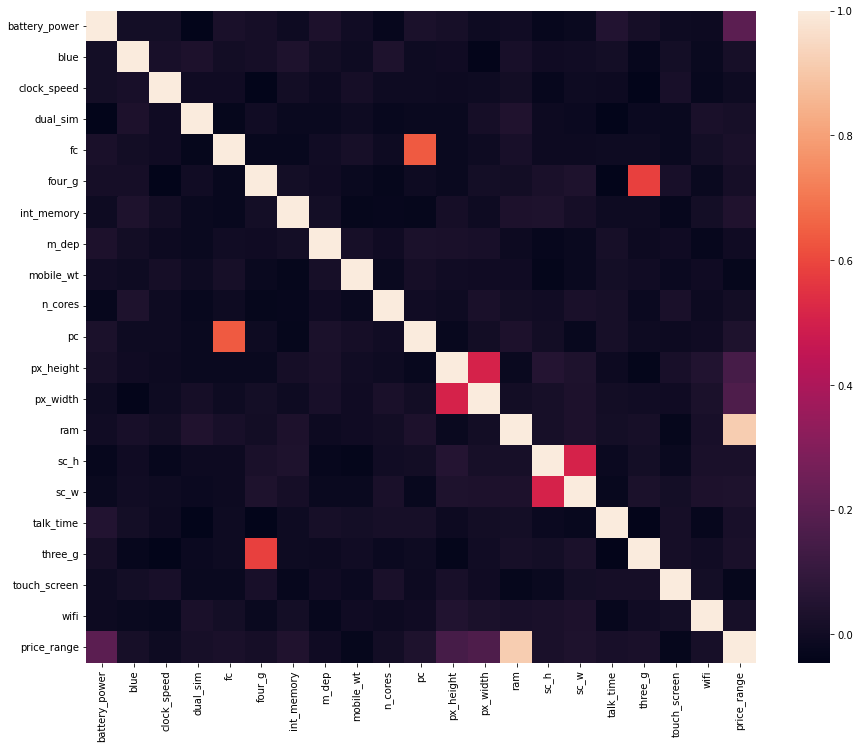

In [525]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

In [526]:
df['price_range'].unique()

array([1, 2, 3, 0])

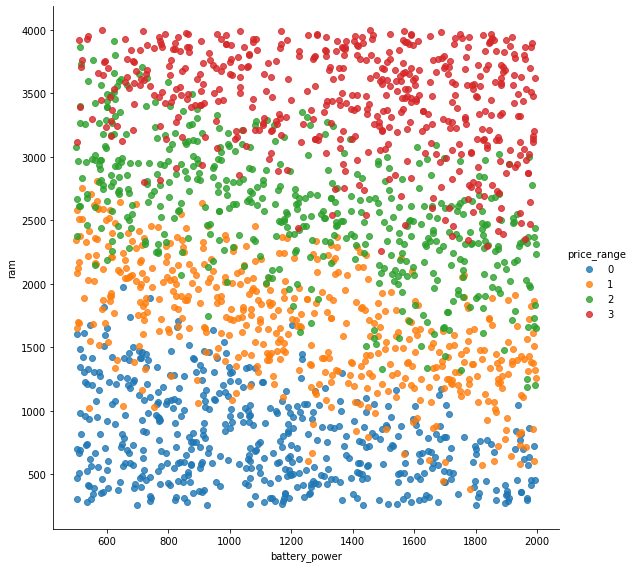

In [527]:
g = sns.FacetGrid(df,hue = 'price_range', height = 8)
g.map(plt.scatter,'battery_power','ram',alpha = 0.8)
g.add_legend()

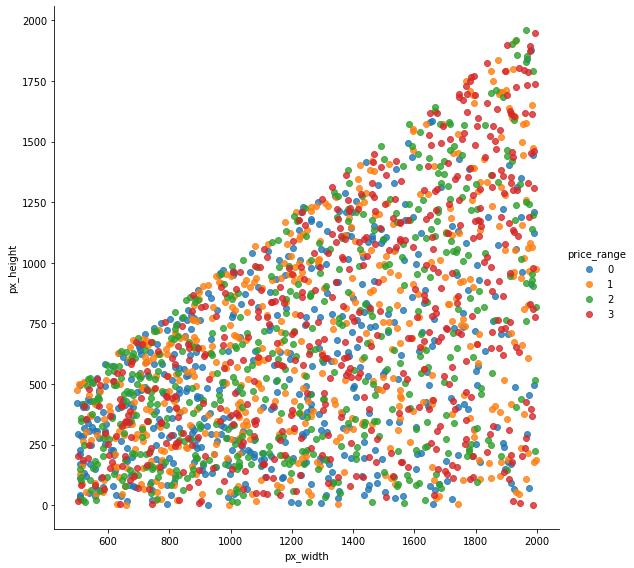

In [528]:
g = sns.FacetGrid(df,hue = 'price_range', height = 8)
g.map(plt.scatter, 'px_width','px_height',alpha = 0.8)
plt.xlabel("px_width")
plt.ylabel("px_height")
g.add_legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc805b2890>,
      dtype=object)

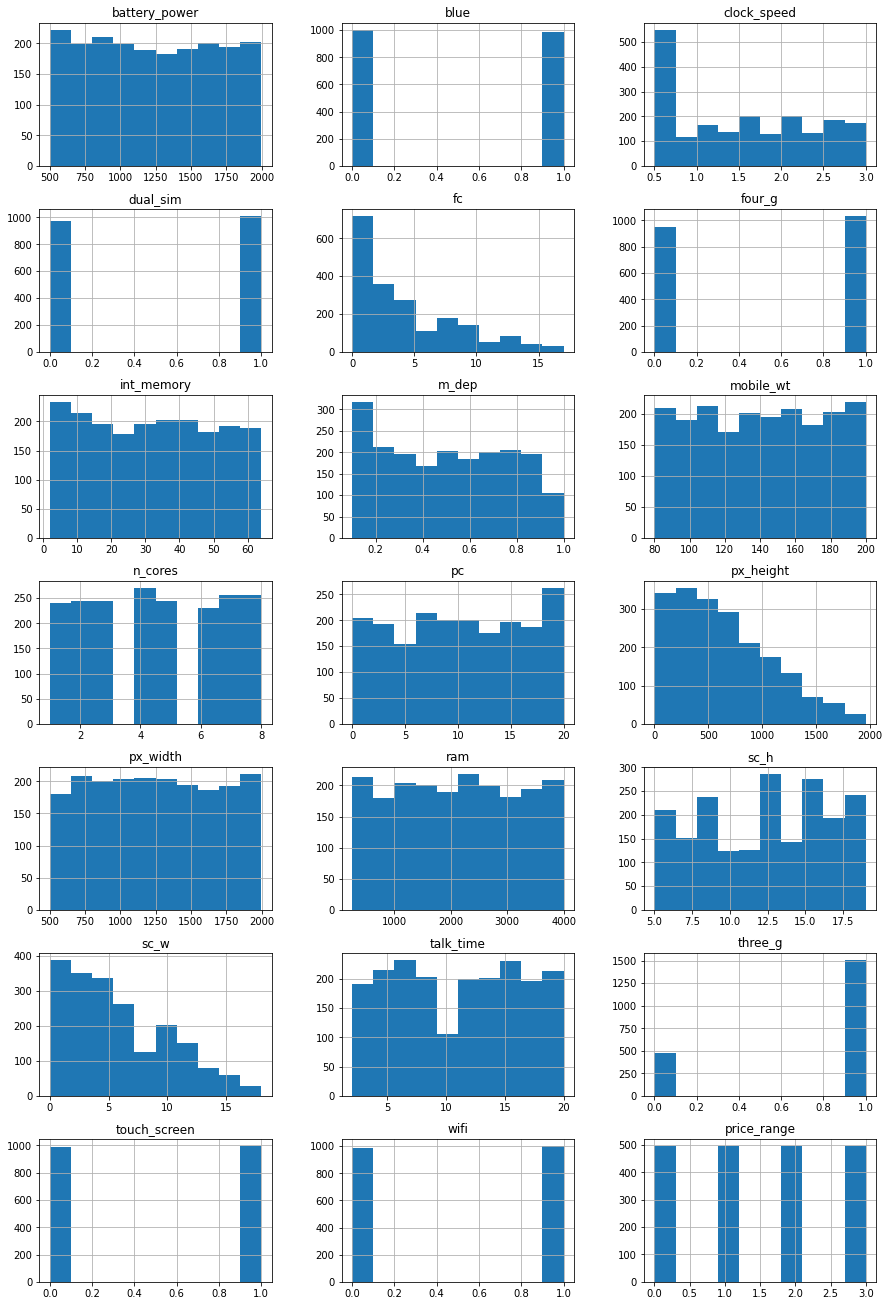

In [529]:
df.hist(figsize=(15,30),layout=(9,3))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


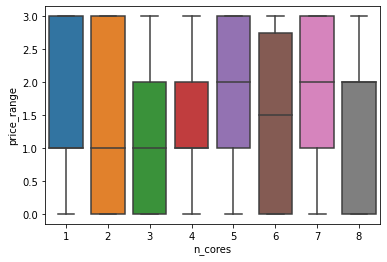

In [530]:
sns.boxplot(df['n_cores'],df['price_range'])
plt.show()

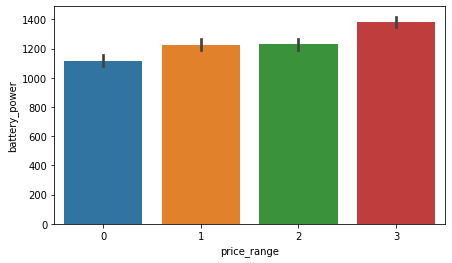

In [531]:
plt.figure(figsize=(7,4))
sns.barplot(x='price_range',y = 'battery_power',data=df)
plt.show()

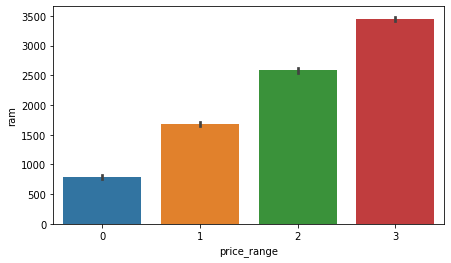

In [532]:
plt.figure(figsize=(7,4))
sns.barplot(x='price_range',y = 'ram',data=df)
plt.show()

Text(0.5, 0, 'MegaPixels')

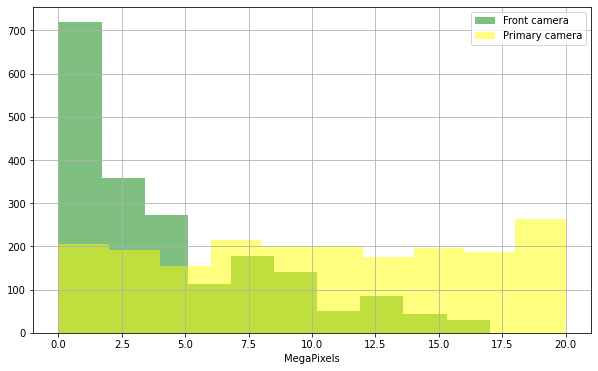

In [533]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='green',label='Front camera')
df['pc'].hist(alpha=0.5,color='yellow',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### hypothesis testing

In [534]:
#hypothesis testing
#one sample t-test
from scipy.stats import ttest_1samp
import numpy as np
CSpeed = df['clock_speed']
print(CSpeed)
speed_mean = np.mean(CSpeed)
print(speed_mean)
tset, pval = ttest_1samp(CSpeed , 1.5) #we are guessing that the mean of speed clock is 1.5
print("p-values")
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0       2.2
1       0.5
2       0.5
3       2.5
4       1.2
       ... 
1995    0.5
1996    2.6
1997    0.9
1998    0.9
1999    2.0
Name: clock_speed, Length: 1988, dtype: float64
1.5221327967806826
p-values
0.22713098296415699
we are accepting null hypothesis


In [535]:
#2sample t-test
from scipy.stats import ttest_ind
import numpy as np
nCore = df['n_cores']
Dsim = df['dual_sim']
print(nCore)
print("nCore data :-\n")
print(Dsim)
nCore_mean = np.mean(nCore)
Dsim_mean = np.mean(Dsim)
print("nCore mean value:",nCore_mean)
print("Dsim mean value:",Dsim_mean)
nCore_std = np.std(nCore)
Dsim_std = np.std(Dsim)
print("week1 std value:",nCore_std)
print("week2 std value:",Dsim_std)
ttest,pval = ttest_ind(nCore,Dsim)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

  #there is not an association between number of cores and dual sim

0       2
1       3
2       5
3       6
4       2
       ..
1995    6
1996    4
1997    8
1998    5
1999    6
Name: n_cores, Length: 1988, dtype: int64
nCore data :-

0       0
1       1
2       1
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    0
1999    1
Name: dual_sim, Length: 1988, dtype: int64
nCore mean value: 4.5241448692152915
Dsim mean value: 0.5090543259557344
week1 std value: 2.2894035763823117
week2 std value: 0.4999180124595233
p-value 0.0
we reject null hypothesis


In [536]:
#z-test
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['ram'], x2=df['int_memory'])
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [537]:
#2sample t-test
from scipy.stats import ttest_ind
import numpy as np
nCore = df['px_height']
Dsim = df['px_width']
print(nCore)
print("nCore data :-\n")
print(Dsim)
nCore_mean = np.mean(nCore)
Dsim_mean = np.mean(Dsim)
print("nCore mean value:",nCore_mean)
print("Dsim mean value:",Dsim_mean)
nCore_std = np.std(nCore)
Dsim_std = np.std(Dsim)
print("week1 std value:",nCore_std)
print("week2 std value:",Dsim_std)
ttest,pval = ttest_ind(nCore,Dsim)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

0         20
1        905
2       1263
3       1216
4       1208
        ... 
1995    1222
1996     915
1997     868
1998     336
1999     483
Name: px_height, Length: 1988, dtype: int64
nCore data :-

0        756
1       1988
2       1716
3       1786
4       1212
        ... 
1995    1890
1996    1965
1997    1632
1998     670
1999     754
Name: px_width, Length: 1988, dtype: int64
nCore mean value: 643.9265593561369
Dsim mean value: 1251.5357142857142
week1 std value: 442.8496159339303
week2 std value: 431.978084659279
p-value 0.0
we reject null hypothesis


In [538]:
#2sample t-test
from scipy.stats import ttest_ind
import numpy as np
nCore = df['n_cores']
Dsim = df['mobile_wt']
print(nCore)
print("nCore data :-\n")
print(Dsim)
nCore_mean = np.mean(nCore)
Dsim_mean = np.mean(Dsim)
print("nCore mean value:",nCore_mean)
print("Dsim mean value:",Dsim_mean)
nCore_std = np.std(nCore)
Dsim_std = np.std(Dsim)
print("week1 std value:",nCore_std)
print("week2 std value:",Dsim_std)
ttest,pval = ttest_ind(nCore,Dsim)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

0       2
1       3
2       5
3       6
4       2
       ..
1995    6
1996    4
1997    8
1998    5
1999    6
Name: n_cores, Length: 1988, dtype: int64
nCore data :-

0       188
1       136
2       145
3       131
4       141
       ... 
1995    106
1996    187
1997    108
1998    145
1999    168
Name: mobile_wt, Length: 1988, dtype: int64
nCore mean value: 4.5241448692152915
Dsim mean value: 140.15945674044266
week1 std value: 2.2894035763823117
week2 std value: 35.35218363031101
p-value 0.0
we reject null hypothesis


In [539]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#scaler = StandardScaler()
x = df.drop('price_range',axis=1)
y = df['price_range']

In [540]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [541]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

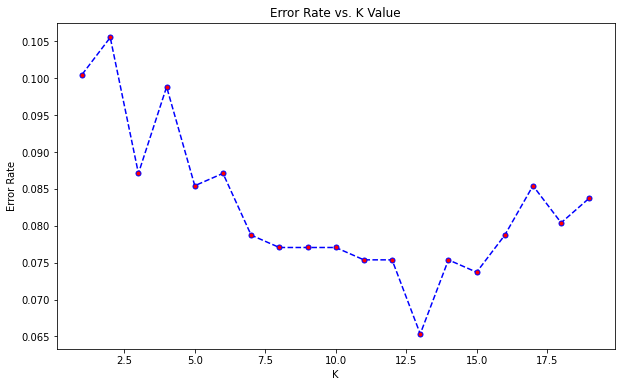

In [542]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [544]:
#knn  #ovo
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [545]:
#calculating accuracy
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

93.47


In [546]:
#Decision Tree   #ovo
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [547]:
acc_dt= round(dtree.score(x_test,y_test) * 100, 2)
print(acc_dt)

80.9


In [548]:
#Random Forest  #ovo
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [549]:
acc_rfc= round(rfc.score(x_test,y_test) * 100, 2)
print(acc_rfc)

87.27


In [550]:
# Making the Confusion Matrix for knn
from sklearn.metrics import confusion_matrix
y_pred_knn= classifier.predict(x_test)
cm_knn= confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[137   0   0   0]
 [  5 137   5   0]
 [  0  12 137   5]
 [  0   0  12 147]]


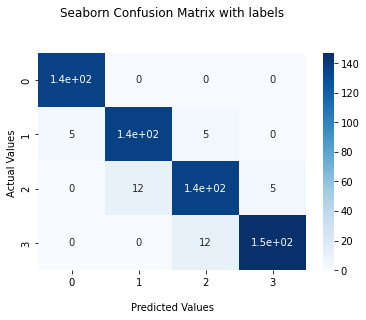

In [551]:
import seaborn as sns
ax = sns.heatmap(cm_knn, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3'])
ax.yaxis.set_ticklabels(['0','1','2','3'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [552]:
# Making the Confusion Matrix for decision tree
from sklearn.metrics import confusion_matrix
y_pred_dt= dtree.predict(x_test)
cm_dt= confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[127  10   0   0]
 [ 13 115  19   0]
 [  0  24 107  23]
 [  0   0  25 134]]


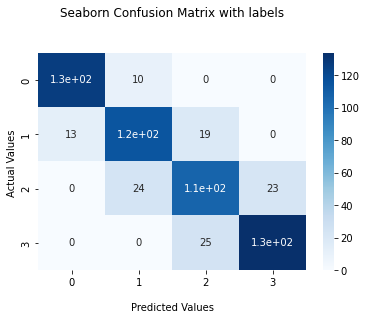

In [553]:
import seaborn as sns
ax = sns.heatmap(cm_dt, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3'])
ax.yaxis.set_ticklabels(['0','1','2','3'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [554]:
# Making the Confusion Matrix for random forest
from sklearn.metrics import confusion_matrix
y_pred_rf= rfc.predict(x_test)
cm_rf= confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[133   4   0   0]
 [  7 128  12   0]
 [  0  24 115  15]
 [  0   0  14 145]]


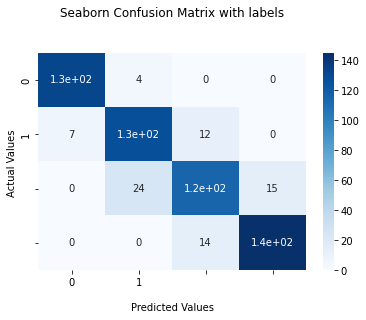

In [555]:
import seaborn as sns
ax = sns.heatmap(cm_rf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


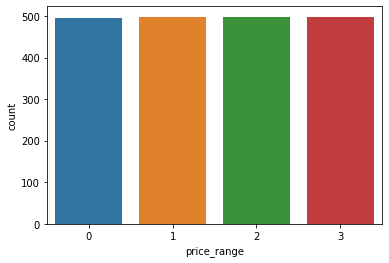

In [556]:
sns.countplot(df['price_range'])
plt.show()

In [557]:
c = df.corr().abs()
filteredDf = c[(c !=1.000)]
s = filteredDf.unstack()
so = s.sort_values(kind="quicksort")
print(so['price_range'])

m_dep            0.001570
clock_speed      0.006042
n_cores          0.007159
four_g           0.015254
blue             0.018009
wifi             0.018434
dual_sim         0.019325
talk_time        0.020810
three_g          0.023952
sc_h             0.024294
fc               0.027334
mobile_wt        0.031180
touch_screen     0.031501
pc               0.036343
sc_w             0.037836
int_memory       0.044144
px_height        0.150439
px_width         0.167571
battery_power    0.201768
ram              0.916742
price_range           NaN
dtype: float64


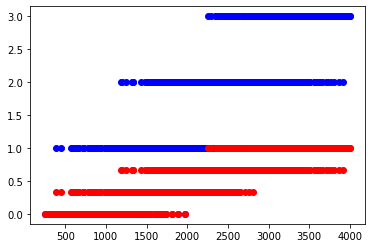

In [558]:
#scaling
#min-max
y = df['price_range']
y1_new = (y-min(y))/(max(y)-min(y))
x = df['ram']
plt.scatter(x, y,  color='blue')
plt.scatter(x, y1_new,  color='red')

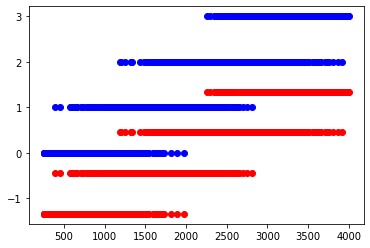

In [559]:
#standard
y2_new = (y-np.mean(y))/np.std(y)
x = df['ram']
plt.scatter(x, y,  color='blue')
plt.scatter(x, y2_new,  color='red')

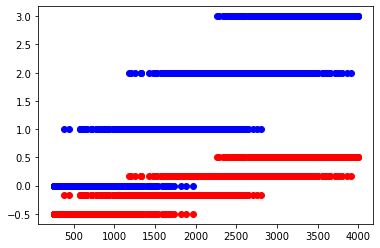

In [560]:
#Normalization
y3_new = (y-np.mean(y))/(max(y)-min(y))
x = df['ram']
plt.scatter(x, y,  color='blue')
plt.scatter(x, y3_new,  color='red')

In [611]:
scaler = StandardScaler()
df1 = df
scaler.fit(df1)
x = df1.drop('price_range',axis=1)
y= df1['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [612]:
#knn  #ovo
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [613]:
#calculating accuracy
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

93.13


In [614]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df
scaler.fit(df1)
x = df1.drop('price_range',axis=1)
y= df1['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [615]:
#calculating accuracy
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

93.13


In [616]:
from sklearn import preprocessing
import numpy as np
df1 = df
# normalize the data attributes
normalized = preprocessing.normalize(df1)
x = df1.drop('price_range',axis=1)
y= df1['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [617]:
#calculating accuracy
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

93.97


### 8

In [618]:
scaler = StandardScaler()
df1 = df
scaler.fit(df1)
x = df1.drop('price_range',axis=1)
y= df1['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

94.97


In [619]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df
scaler.fit(df1)
x = df1.drop('price_range',axis=1)
y= df1['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#calculating accuracy
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

94.47


In [620]:
from sklearn import preprocessing
import numpy as np
df1 = df
# normalize the data attributes
normalized = preprocessing.normalize(df1)
x = df1.drop('price_range',axis=1)
y= df1['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#calculating accuracy
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

94.72


In [621]:
##################################################################################################### 9 to be done:

In [624]:
################################################################

In [625]:
df2=df
df2['price_range'] = df2['price_range'].replace([1,2,3],5)      
df2['price_range']

0       5
1       5
2       5
3       5
4       5
       ..
1995    0
1996    5
1997    5
1998    0
1999    5
Name: price_range, Length: 1988, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


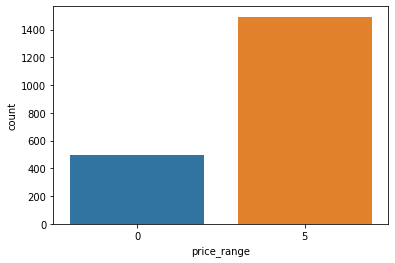

In [626]:
sns.countplot(df2['price_range'])
plt.show()

In [627]:
#knn imbalanced data
x = df2.drop('price_range',axis=1)
y= df2['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

97.99


[[136   5]
 [  7 449]]


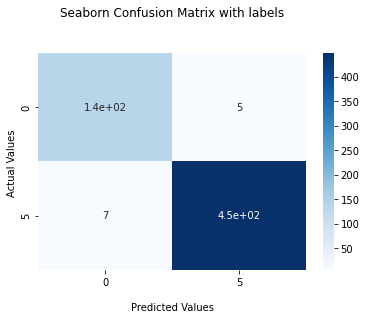

In [628]:

y_pred_knn= classifier.predict(x_test)
cm_knn= confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
ax = sns.heatmap(cm_knn, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5'])
ax.yaxis.set_ticklabels(['0','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [629]:
# Making the Confusion Matrix for decision tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dt= dtree.predict(x_test)
dt_knn= round(dtree.score(x_test,y_test) * 100, 2)
print(dt_knn)

95.31


[[124  17]
 [ 11 445]]


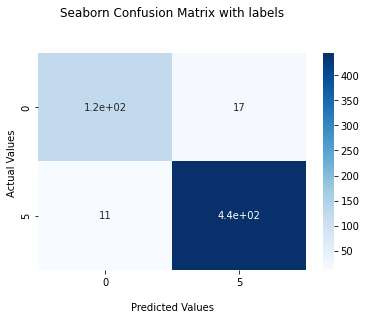

In [630]:
import seaborn as sns
cm_dt= confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
ax = sns.heatmap(cm_dt, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5'])
ax.yaxis.set_ticklabels(['0','5'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [631]:
# class count
class_count_5, class_count_0 = df2['price_range'].value_counts()

# Separate class
class_0 = df2[df2['price_range'] == 0]
class_5 = df2[df2['price_range'] == 5]# print the shape of the class
print('class 0:', class_0.shape)
print('class 5:', class_5.shape)

class 0: (496, 21)
class 5: (1492, 21)


total class of 1 and0: 5    496
0    496
Name: price_range, dtype: int64


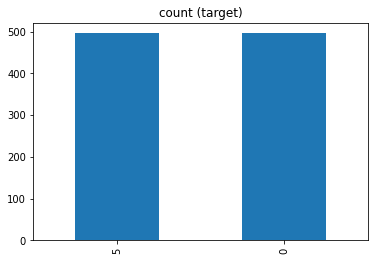

In [632]:
class5_under = class_5.sample(class_count_0)

test_under = pd.concat([class5_under, class_0], axis=0)

print("total class of 1 and0:",test_under['price_range'].value_counts())# plot the count after under-sampeling
test_under['price_range'].value_counts().plot(kind='bar', title='count (target)')

In [633]:
#knn balanced data
df2 = test_under
x = df2.drop('price_range',axis=1)
y= df2['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
acc_knn= round(classifier.score(x_test,y_test) * 100, 2)
print(acc_knn)

96.64


In [634]:
# Making the Confusion Matrix for decision tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dt= dtree.predict(x_test)
acc_knn= round(dtree.score(x_test,y_test) * 100, 2)
print(acc_knn)

94.3
